This tutorial will highligh the major viz related features of Datamol.

In [2]:
import datamol as dm

First let's get a dataset.

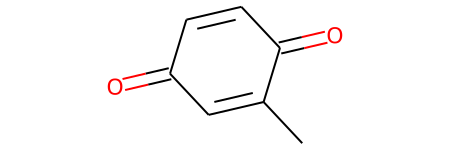

In [11]:
data = dm.read_csv(
    "https://raw.githubusercontent.com/rdkit/rdkit/master/Data/NCI/first_200.tpsa.csv",
    comment="#",
    header=None,
)
data.columns = ["smiles", "tpsa"]

# Create a mol column
with dm.without_rdkit_log():
    data["mol"] = data["smiles"].apply(dm.to_mol)

# Patch the dataframe to render the molecules in it
dm.render_mol_df(data)

data.iloc[0]["mol"]

Now let's cluster the molecules and only keep the first cluster.

In [59]:
cluster_indices, cluster_mols = dm.cluster_mols(data["mol"].dropna().tolist(), cutoff=0.7)
mols = cluster_mols[1]

Display the molecules of the cluster while aligning then using MCS. This can be done using a simple boolean flag in `dm.to_image()`.

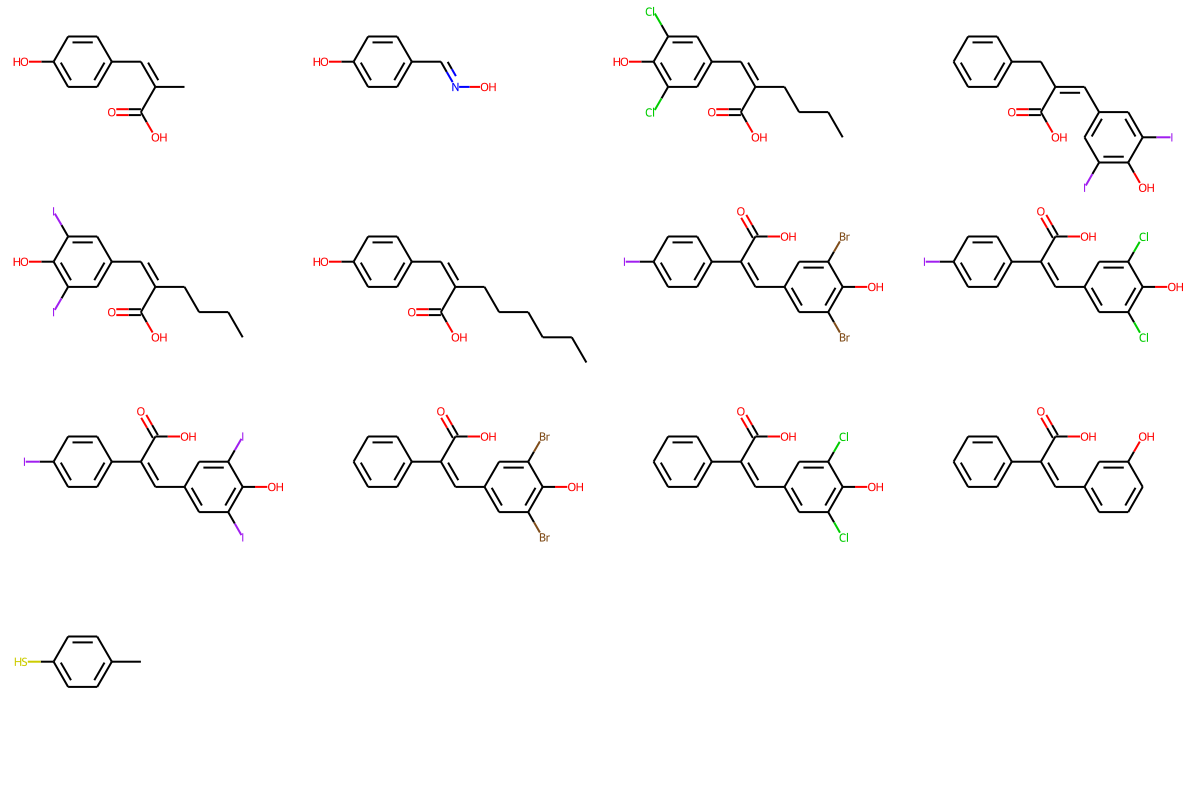

In [62]:
dm.to_image(mols, mol_size=(300, 200), align=True)